# Юнит 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sber_data = pd.read_csv('../data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [ ]:
sber_data.info()
sber_data.describe().loc[:,'price_doc']

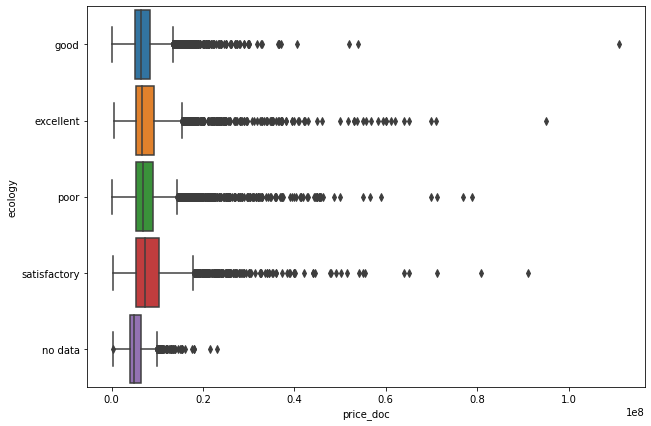

In [11]:
fig1 = plt.figure(figsize=(10, 7))
fig1_content = sns.boxplot(
    data=sber_data,
    y='ecology',
    x='price_doc',
    orient='h',
    width=0.9
)

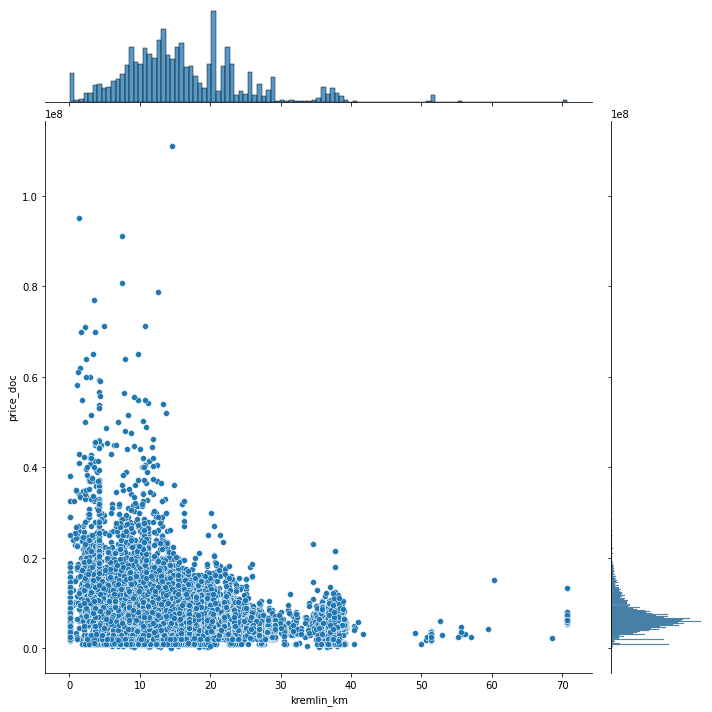

In [14]:
fig2_content = sns.jointplot(
    data=sber_data, 
    x='kremlin_km', 
    y='price_doc',
    #xlim = (0, 40),
    #ylim = (0, 0.1),
    height=10,
)

# Юнит 4

In [ ]:
"""
Ваша задача очистить данную таблицу от пропусков следующим образом:
- Если признак имеет больше 50% пропущенных значений - удалите его
- Для оставшихся данных: если в строке более 2 пропусков - удалите строку
- Для оставшихся данных: числовые признаки заполните средним значением, а категориальные - модой
Результат должен находиться в переменной df
"""

df = pd.read_csv('../data/test_data.csv')
display(df)
#df.info()

thresh_row = df.shape[0]*0.5
thresh_col = df.shape[1] - 3
df = df.dropna(how='any', thresh=thresh_row, axis=1)
df = df.dropna(how='any', thresh=thresh_col, axis=0)

values = {
    'one': df['one'].mean(),
    'two': df['two'].mean(),
    'three': df['three'].mean(),
    'four': df['four'].mode()[0]
}

df = df.fillna(values)

display(df)

# Юнит 6

0        15.581952
1        15.607270
2        15.555977
3        16.388123
4        16.608603
           ...    
30466    15.816991
30467    17.034386
30468    15.757264
30469    16.418200
30470    15.538277
Name: price_doc, Length: 30471, dtype: float64

pandas.core.series.Series

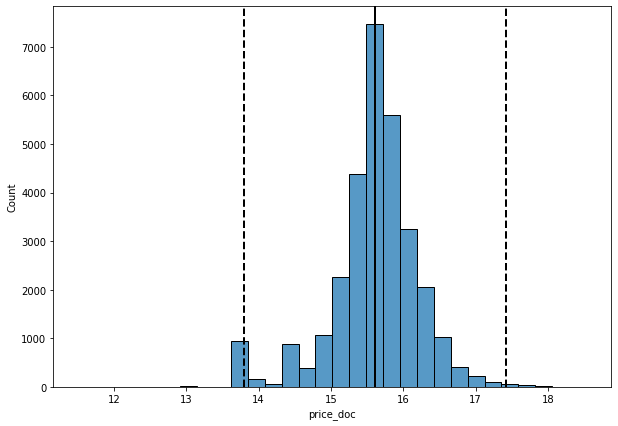

In [31]:
price_doc_log = np.log(sber_data['price_doc']+1)
display(price_doc_log, type(price_doc_log))

fig = plt.figure(figsize=(10, 7))
histplot = sns.histplot(price_doc_log, bins=30)
histplot.axvline(price_doc_log.mean(), color='k', lw=2)
histplot.axvline(price_doc_log.mean()+ 3 * price_doc_log.std(), color='k', ls='--', lw=2)
histplot.axvline(price_doc_log.mean()- 3 * price_doc_log.std(), color='k', ls='--', lw=2)

In [70]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned


outliers_z_score_mod(data=sber_data, feature='price_doc', left=3.7, right=3.7, log_scale=True)[0].shape


NameError: name 'sber_data' is not defined

In [73]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    
    if log_scale:
        #x = np.log(data[feature]+1)
        x = np.log(data[feature])
    else:
        x = data[feature]

    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers_iqr_mod(sber_data, 'price_doc', 3, 3, True)[0].shape

NameError: name 'sber_data' is not defined

# Юнит 8

In [3]:
diabetes_data = pd.read_csv('../data/diabetes_data.csv')

In [7]:
diabetes_data.info()
diabetes_data.describe()
#diabetes_data.describe(include='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
diabetes_data_cl = diabetes_data.drop_duplicates()
diabetes_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 66.0+ KB


In [39]:
low_info_cols = []

for col in diabetes_data.columns:
    top_friq = diabetes_data_cl[col].value_counts(normalize=True).max()
    if top_friq > 0.95:
        low_info_cols.append(col)
    
    if diabetes_data_cl[col].nunique() / diabetes_data_cl[col].count() > 0.95:
        low_info_cols.append(col)

display(low_info_cols)
diabetes_data_cl = diabetes_data_cl.drop(low_info_cols, axis=1)
diabetes_data_cl.info()        

['Gender']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [58]:
cols_to_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


for col in cols_to_nan:
    diabetes_data_cl[col] = diabetes_data_cl[col].apply(lambda x: np.nan if x==0 else x)
    
diabetes_data_cl.info()

0       98.0
1      112.0
2      108.0
3      107.0
4      136.0
       ...  
763    139.0
764     96.0
765    101.0
766    141.0
767    125.0
Name: Glucose, Length: 768, dtype: float64

0       58.0
1       75.0
2       64.0
3       80.0
4       90.0
       ...  
763     64.0
764    122.0
765     86.0
766      NaN
767     96.0
Name: BloodPressure, Length: 768, dtype: float64

0      33.0
1      32.0
2       NaN
3       NaN
4       NaN
       ... 
763    35.0
764     NaN
765    37.0
766     NaN
767     NaN
Name: SkinThickness, Length: 768, dtype: float64

0      190.0
1        NaN
2        NaN
3        NaN
4        NaN
       ...  
763    140.0
764      NaN
765      NaN
766      NaN
767      NaN
Name: Insulin, Length: 768, dtype: float64

0      34.0
1      35.7
2      30.8
3      24.6
4      29.9
       ... 
763    28.6
764    22.4
765    45.6
766    42.4
767    22.5
Name: BMI, Length: 768, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


(768, 9)

In [61]:
thresh_row = diabetes_data_cl.shape[0]*0.7
diabetes_data_cl = diabetes_data_cl.dropna(how='any', thresh=thresh_row, axis=1)
diabetes_data_cl.info()

537.5999999999999

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 54.0 KB


In [62]:
thresh_col = diabetes_data_cl.shape[1] - 2
diabetes_data_cl = diabetes_data_cl.dropna(how='any', thresh=thresh_col, axis=0)
diabetes_data_cl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [66]:
value_dict = {
    'Glucose': diabetes_data_cl['Glucose'].median(),
    'BloodPressure': diabetes_data_cl['BloodPressure'].median(),
    'SkinThickness': diabetes_data_cl['SkinThickness'].median(),
    'BMI': diabetes_data_cl['BMI'].median()
}

diabetes_data_cl = diabetes_data_cl.fillna(value_dict)

diabetes_data_cl['SkinThickness'].mean()

29.109067017082786

In [69]:
outliers_iqr_mod(data=diabetes_data_cl, feature='SkinThickness')[0].shape

(87, 8)

In [71]:
outliers_z_score_mod(data=diabetes_data_cl, feature='DiabetesPedigreeFunction')[0].shape

(4, 8)

In [74]:
outliers_iqr_mod(data=diabetes_data_cl, feature='DiabetesPedigreeFunction')[0].shape[0] - outliers_iqr_mod(data=diabetes_data_cl, feature='DiabetesPedigreeFunction', log_scale=True)[0].shape[0]

29